# For the same IRIS dataset, your next task is to perform correlation analysis to understand the relationships between these attributes. 
Load the Iris dataset into Python and explore its structure, ensuring it contains relevant numerical attributes for correlation analysis.
Calculate the correlation coefficient between each pair of attributes in the Iris dataset.
Visualize the correlation matrix using a heatmap to better understand the strength and direction of the correlations among the iris flower attributes. 
Identify highly correlated attribute pairs, both positively and negatively correlated, and discuss their implications in the context of iris flower characteristics. 
Based on the correlation analysis, draw insights into which attributes might have a strong influence on the characteristics of iris flowers.
Your Python code should include functions to calculate correlation coefficients, create the correlation matrix, and generate the heatmap. Ensure to provide clear explanations and insights based on your correlation analysis.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('iris.csv')

In [5]:
df.drop('Id',axis=1,inplace=True)

In [6]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


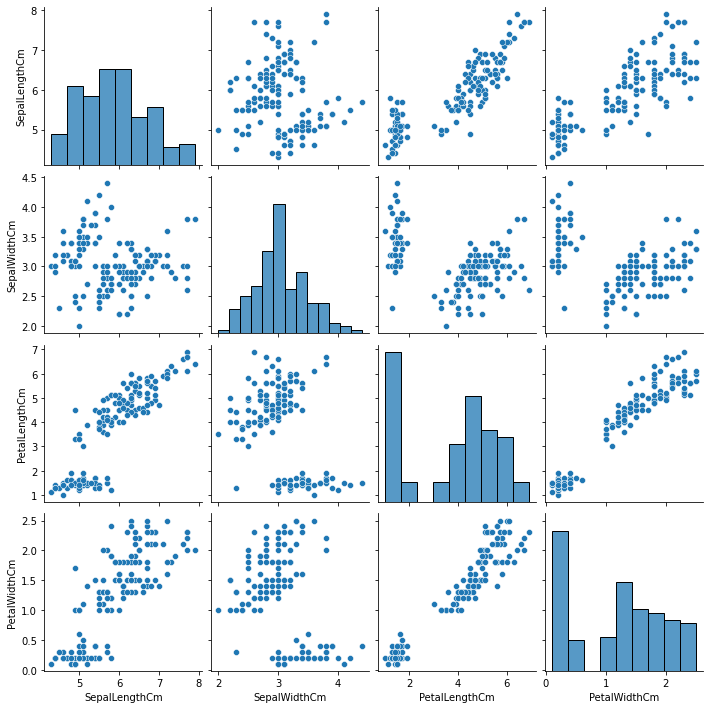

In [7]:
sns.pairplot(df)

# Correlation matrix without using in built functions

In [14]:
def correlation_mat(df):
    rows,cols=df.shape
    corr_mat=[[0 for _ in range(cols)]for _ in range(cols)]
    for i in range(cols):
        for j in range(i,cols):
            covar_ij=sum((df.iloc[:,i]-df.iloc[:,i].mean())*(df.iloc[:,j]-df.iloc[:,j].mean()))/(rows-1)
            std_i = (sum((df.iloc[:, i] - df.iloc[:, i].mean()) ** 2) / (rows - 1)) ** 0.5
            std_j = (sum((df.iloc[:, j] - df.iloc[:, j].mean()) ** 2) / (rows - 1)) ** 0.5
            corr_mat[i][j]=covar_ij/(std_i*std_j)
            corr_mat[j][i]=corr_mat[i][j]
            
    return corr_mat

df1=df.drop('Species',axis=1)

corr_mat=correlation_mat(df1)
print("correlation matrix")
corr_ma = pd.DataFrame(corr_mat,columns=df1.columns,index=df1.columns)
corr_ma
        

correlation matrix


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


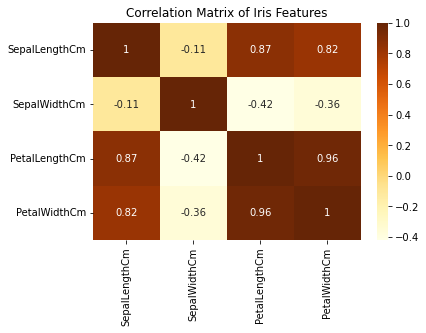

In [20]:
dfplot = sns.heatmap(corr_ma, cmap="YlOrBr", annot=True)
plt.title('Correlation Matrix of Iris Features')
plt.show()

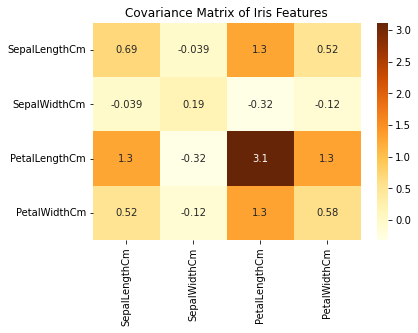

In [22]:
dataplot = sns.heatmap(df.cov(), cmap="YlOrBr", annot=True)
plt.title('Covariance Matrix of Iris Features')
plt.show()

# Correlation matrix using inbulit functions

In [24]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


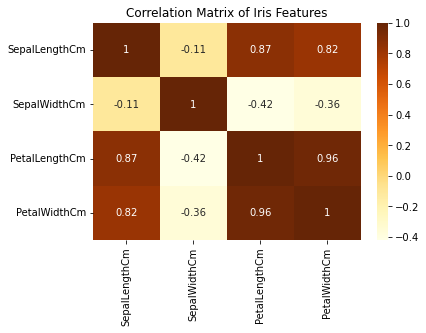

In [23]:
dataplot = sns.heatmap(df.corr(), cmap="YlOrBr", annot=True)
plt.title('Correlation Matrix of Iris Features')
plt.show()

# Based on the correlation analysis, some insights

Here, we can observe that there are both positive and negative correlations between the features.
Accordingly, qualities with low correlation values are inversely correlated with one another, whilst features with high correlation values are directly correlated with one another.
The relationship between sepal length and width is very weakly negative; as sepal length increases, sepal width decreases slightly and vice versa.
Petal Length and Petal breadth are highly positively connected, meaning that increasing petal length will significantly increase petal breadth and vice versa.
Sepal Width and Petal Length are the features in the matrix that are most strongly negatively connected.

A strong positive correlation is shown by values closer to 1 in the correlation matrix, and a strong negative correlation is indicated by values closer to -1. Closer to 0 values suggest a weak or nonexistent association.

Based on the intensity of the colors, you may determine which attribute pairings are highly associated from the heatmap. When one attribute increases, the other tends to increase as well, according to positive correlation, and when one attribute increases, the other tends to decrease, according to negative correlation.


Based on the Iris dataset's correlation analysis:

Petal Width and Petal Length have a significant positive association that is close to This suggests that the width of the petals tends to increase along with their length. This relationship supports the hypothesis that wider petals are typically larger.

There is a moderately favorable association between petal length and sepal length. Longer sepals are frequently related to longer petals.

There is a marginally positive association between petal length and sepal width. Wider sepals are sluggishly correlated with longer petals.

There is a slender positive association between petal width and sepal length. Longer sepals are typically paired with wider petals.

There is a very modest correlation between petal and sepal width.